### Оптимизация портфеля

In [ ]:
Иницилизация,

In [1]:
from pfp_products import *
from pfp_optimization import *
from pfp_stat import *
import numpy as np
import pandas as pd 

# set constants & assumbtions

n_scenarios = 1000
simulation_years = 10         # срок моделирования инструментов - 10 лет
client_term = 10              # срок портфеля - 10 лет
points_in_year = 12           # 12 модельных точек в году

In [2]:
# Моделируем базовые активы
BAs = read_prodcat('prodcat.xlsx')[2]
prices = ba_scenarios(BAs, simulation_years, points_in_year, n_scenarios)

# Моделируем продукты
total, names = calc_products2(prices, simulation_years, points_in_year, client_term)

# сейчас этот модуль выводит статистики по моделируемым инструментам: средние, волатильности и корреляции. 
# Все в масштабе года.

Means: 
BAYN GY Equity       0.051034
DIS us equity        0.110666
DAL us equity        0.231161
ROG SE Equity        0.005159
ADS GY equity        0.167868
SBER LI EQUITY       0.027361
PFE UN Equity        0.045947
TRDILMS RU EQUITY    0.065819
NOVN SE Equity       0.032227
PIMGCIA ID equity    0.031510
IXN us equity        0.168959
MCD us equity        0.097899
XLP us equity        0.048813
SAN FP Equity       -0.033702
TRDDRUZ RU EQUITY    0.108175
TRDPTNT RU EQUITY    0.102709
HEN3 GY equity       0.070517
DAI GY equity        0.073006
dtype: float64
Sigmas: 
BAYN GY Equity       0.031690
DIS us equity        0.025126
DAL us equity        0.039583
ROG SE Equity        0.025640
ADS GY equity        0.035377
SBER LI EQUITY       0.058693
PFE UN Equity        0.024172
TRDILMS RU EQUITY    0.010403
NOVN SE Equity       0.025714
PIMGCIA ID equity    0.004473
IXN us equity        0.019998
MCD us equity        0.020697
XLP us equity        0.014980
SAN FP Equity        0.029694
TRDDRUZ 

#### Строим распределение доходностей, считаем среднюю доходность, волатильности фин результата и риск (средние потери) по всем продуктам, участвующим в расчете.

1.0 		 ИСЖ ГФО


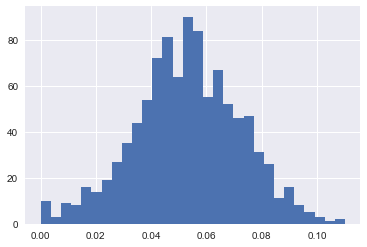

income = 		 0.0530140890731
volatility = 		 0.0192168317192
risk =   		 0
------------------------
1.0 		 ИСЖ новые технологии


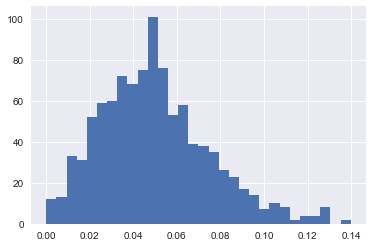

income = 		 0.0498852922842
volatility = 		 0.0251951304128
risk =   		 0
------------------------
1.0 		 ИСЖ потребительские товары


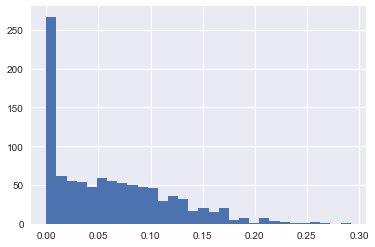

income = 		 0.0602254579368
volatility = 		 0.0564729930608
risk =   		 0
------------------------
1.0 		 ИСЖ MCD DAL DIS


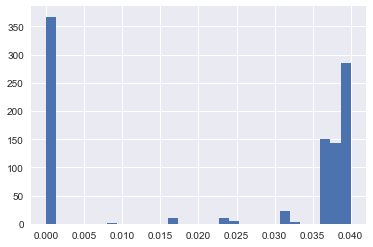

income = 		 0.0236637565918
volatility = 		 0.0183245314371
risk =   		 0
------------------------
1.0 		 ИСЖ дойче купон


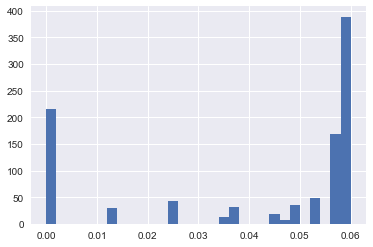

income = 		 0.0413836511328
volatility = 		 0.0242604601022
risk =   		 0
------------------------
1.0 		 ИСЖ 4 фармы


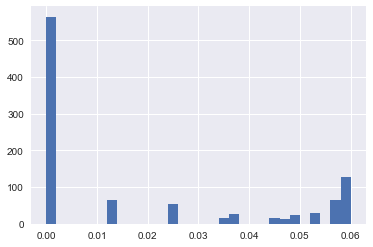

income = 		 0.0190507024949
volatility = 		 0.0245509219042
risk =   		 0
------------------------
1.0 		 ИСЖ 4+1 фармы


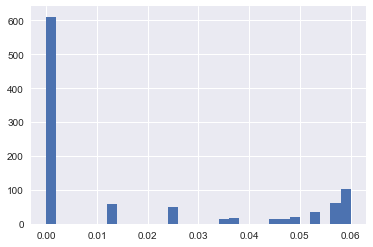

income = 		 0.0169367522031
volatility = 		 0.0238617007688
risk =   		 0
------------------------
1.0 		 Callable note MCD


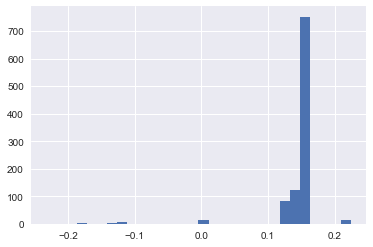

income = 		 0.142401215655
volatility = 		 0.0387577291915
risk =   		 0.145557835733
------------------------
1.0 		 Депозит 1


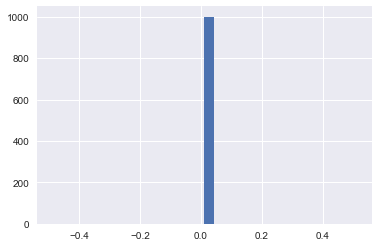

income = 		 0.01
volatility = 		 0
risk =   		 0
------------------------
1.0 		 Депозит 2


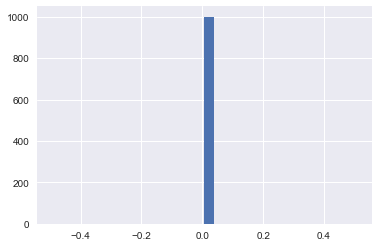

income = 		 0.00601652753096
volatility = 		 0
risk =   		 0
------------------------
1.0 		 ПИФ "Илья Муромец"


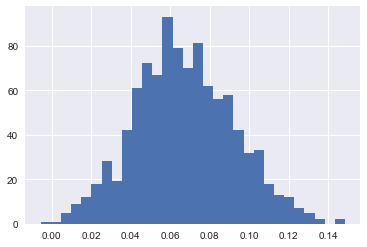

income = 		 0.0671969967279
volatility = 		 0.0251720981377
risk =   		 0.00554298853153
------------------------
1.0 		 ПИФ "Компании малой капитализации"


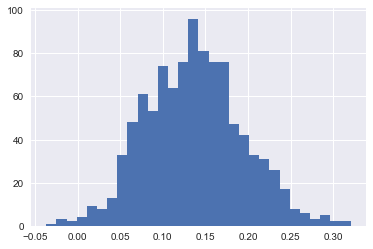

income = 		 0.136937115322
volatility = 		 0.0567881196795
risk =   		 0.0164022955803
------------------------
1.0 		 ПИФ "Сбалансированный"


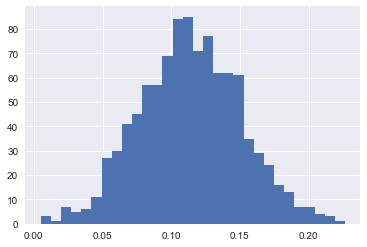

income = 		 0.113778875593
volatility = 		 0.0368667570514
risk =   		 0
------------------------
1.0 		 БСО АДР Сбербанка


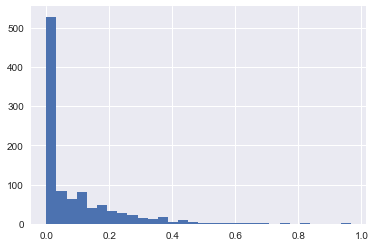

income = 		 0.0857134992363
volatility = 		 0.127561260626
risk =   		 0
------------------------


In [3]:
%matplotlib inline

# на какие продукты смотрим?
for i in range(0,len(names)):
    weights = np.zeros(len(names))
    weights[i] = 1
    report(weights, total, names)

#### Теперь будем оптимизировать.
Сначала будем штрафровать функицю полезности за уровень риска портфеля и уровень волатильности финансового результата.
Если штрафовать строго - останется только депозит:

0.42 		 ИСЖ ГФО
0.19 		 ИСЖ новые технологии
0.03 		 ИСЖ дойче купон
0.08 		 Депозит 1
0.19 		 ПИФ "Илья Муромец"
0.09 		 ПИФ "Сбалансированный"


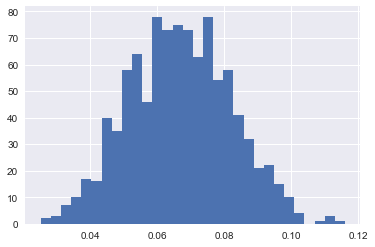

income = 		 0.0668196958389
volatility = 		 0.0152247497826
risk =   		 0
------------------------
CPU times: user 5min 59s, sys: 9.32 s, total: 6min 8s
Wall time: 6min 18s


In [ ]:
%%time

#поехали
vol_penalty = 1
risk_penalty = 1

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 


Попробуем уменьшить штраф за волатильность. Видно, что теперь в портфель попало больше инструментов, причем основную долю забрали ГФО (37%), Новые технологии (29%) и ПИФ Илья Муромец (21%).

In [ ]:
%%time
#поехали
vol_penalty = 0.5
risk_penalty = 1

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 

Уберем штраф за волатильность совсем. 
Теперь модель старательно минимизирует риск, но на волатильность доходности не обращет внимания. И максимизирует среднюю доходность.

Баланс в портфеле изменился. 
Теперь ГФО 18%, ПИФ Сбалансированный - 14%, а БСО на АДР Сбера - 67%!

In [ ]:
%%time
#поехали
vol_penalty = 0
risk_penalty = 1

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 

Отменим штрафы за волатильности и риск совсем.
Как и ожидалось - модель оставляет в портфеле всего один продукт - ПИФ компаний малой капитализации.

In [ ]:
%%time
#поехали
vol_penalty = 0
risk_penalty = 0

weights, func = find_best_wghts(total, vol_penalty, risk_penalty)
report(np.round(weights,2), total, names, vol_penalty, risk_penalty) 